# COVID-19 CNN Pneumonia Detector

### Importing Library

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

### Preprocessing the training set

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
training_set = train_datagen.flow_from_directory('xray_dataset_covid19/train',target_size = (64, 64),batch_size = 32,class_mode = 'binary')

Found 148 images belonging to 2 classes.


### Preprocessing the test set

In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('xray_dataset_covid19/test',target_size = (64, 64),batch_size = 32,class_mode = 'binary')

Found 40 images belonging to 2 classes.


### Building CNN

In [4]:
cnn = tf.keras.models.Sequential()

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [6]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

In [8]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [9]:
cnn.add(tf.keras.layers.Flatten())

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [11]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

### Training CNN on Training set

In [12]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [13]:
hist = cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
5/5 [==============================] - 7s 1s/step - loss: 0.8568 - accuracy: 0.3919 - val_loss: 0.6992 - val_accuracy: 0.5000
Epoch 2/25
5/5 [==============================] - 5s 1s/step - loss: 0.6858 - accuracy: 0.5000 - val_loss: 0.6683 - val_accuracy: 0.5000
Epoch 3/25
5/5 [==============================] - 5s 1s/step - loss: 0.6682 - accuracy: 0.5000 - val_loss: 0.6209 - val_accuracy: 0.7000
Epoch 4/25
5/5 [==============================] - 5s 1s/step - loss: 0.6311 - accuracy: 0.6757 - val_loss: 0.5402 - val_accuracy: 0.9750
Epoch 5/25
5/5 [==============================] - 5s 1s/step - loss: 0.5777 - accuracy: 0.8378 - val_loss: 0.4326 - val_accuracy: 0.9000
Epoch 6/25
5/5 [==============================] - 5s 1s/step - loss: 0.4922 - accuracy: 0.8108 - val_loss: 0.2720 - val_accuracy: 1.0000
Epoch 7/25
5/5 [==============================] - 5s 1s/step - loss: 0.4096 - accuracy: 0.8581 - val_loss: 0.2035 - val_accuracy: 0.9500
Epoch 8/25
5/5 [=========================

### Visualizing results

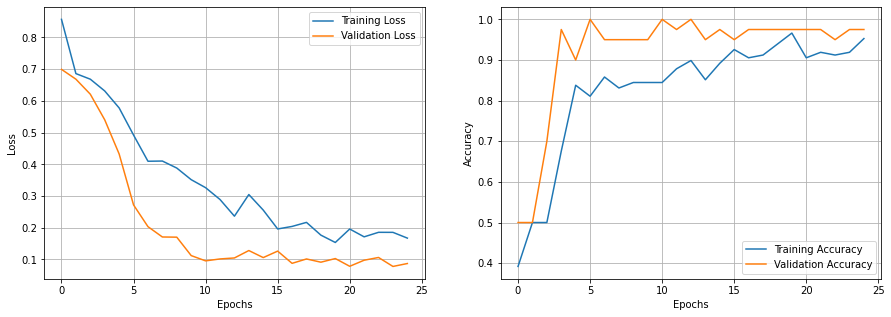

In [14]:
plt.figure(1, figsize = (15, 5))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( hist.history["loss"], label = "Training Loss")
plt.plot( hist.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( hist.history["accuracy"], label = "Training Accuracy")
plt.plot( hist.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()
plt.show()

### Making a single Prediction

In [15]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('xray_dataset_covid19/single_prediction/Normal.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'Pneumonia'
else:
    prediction = 'Normal'

In [16]:
print(prediction)

Normal


In [17]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('xray_dataset_covid19/single_prediction/pneumonia.jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'Pneumonia'
else:
    prediction = 'Normal'

In [18]:
print(prediction)

Pneumonia
